In [46]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks
from skimage.segmentation import slic, watershed, mark_boundaries
from skimage.segmentation import felzenszwalb, slic
from skimage.measure import regionprops, label
from skimage.feature import peak_local_max
from skimage.morphology import label
from scipy.ndimage import label

In [2]:
image_path = 'cat.png'
image = cv2.imread(image_path)
imager = cv2.imread(image_path)

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image

array([[187, 187, 187, ..., 189, 189, 189],
       [187, 187, 187, ..., 188, 189, 189],
       [187, 187, 187, ..., 189, 188, 189],
       ...,
       [171, 171, 171, ..., 177, 177, 177],
       [171, 171, 171, ..., 181, 181, 181],
       [171, 171, 171, ..., 184, 184, 184]], dtype=uint8)

In [4]:
_, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opening = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

In [6]:
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
damaged_image = cv2.drawContours(image.copy(), contours, -1, (0, 0, 255), 2)

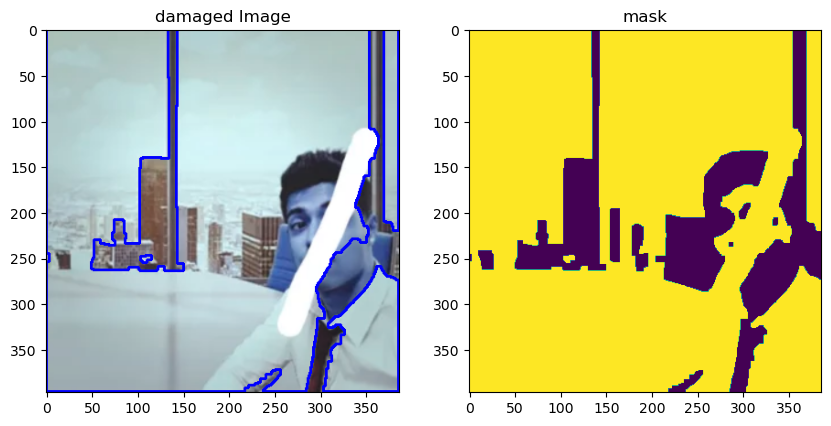

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(damaged_image)
axs[0].set_title('damaged Image')
axs[1].imshow(closing)
axs[1].set_title('mask')
plt.show()

In [9]:
cv2.imwrite('damaged_image.png', damaged_image)
cv2.imwrite('binary_mask.png', closing)

True

In [19]:
Display the original image and damaged image with contours
combined_image = np.concatenate((image, damaged_image), axis=1)
cv2.imshow('Original Image | Damaged Regions', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# Load an image using scikit-image
image = io.imread('cat.png')

# Convert the image to grayscale
gray = io.imread('cat.png', as_gray=True)

# Apply Harris corner detection
corners = corner_harris(gray, sigma=2)

# Find the peaks of the Harris corner response (i.e., the corners)
coordinates = corner_peaks(corners, min_distance=10)


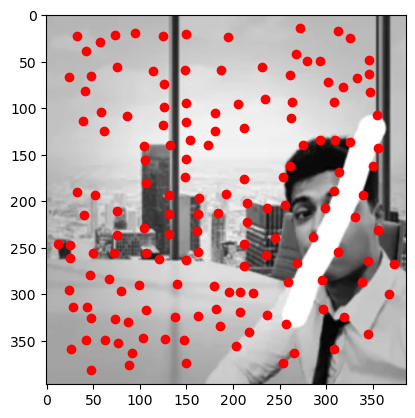

In [11]:

# Display the corners

fig, ax = plt.subplots()
ax.imshow(gray, cmap='gray')
ax.plot(coordinates[:, 1], coordinates[:, 0], 'ro')
plt.show()

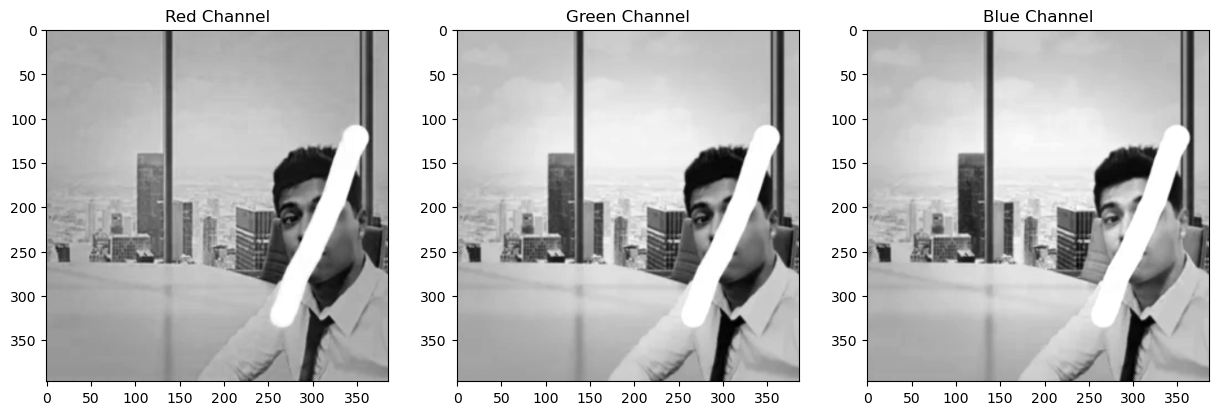

In [12]:
# Access the red channel
red_channel = image[:, :, 2]
# Access the green channel
green_channel = image[:, :, 1]
# Access the blue channel
blue_channel = image[:, :, 0]

# Display the color channels in a subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(red_channel, cmap="gray")
axs[0].set_title("Red Channel")

axs[1].imshow(green_channel, cmap="gray")
axs[1].set_title("Green Channel")

axs[2].imshow(blue_channel, cmap="gray")
axs[2].set_title("Blue Channel")

plt.show()

In [13]:
# Define the region of interest (ROI) as a binary mask
roi = np.zeros(image.shape[:2], dtype=np.uint8)
roi[100:200, 100:200] = 255

# Compute the gradient of the image using Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Compute the gradient magnitude and orientation
grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
grad_orient = np.arctan2(sobel_y, sobel_x)

# Compute the structure tensor
w = np.exp(-((grad_orient - np.mean(grad_orient[roi > 0])) / (2 * 0.5**2)))
S = np.zeros((2, 2))
S[0, 0] = np.sum(w * sobel_x[:, :]**2)
S[0, 1] = np.sum(w * sobel_x[:, :] * sobel_y[:, :])
S[1, 0] = S[0, 1]
S[1, 1] = np.sum(w * sobel_y[:, :]**2)

# Compute the eigenvalues and eigenvectors of the structure tensor
eigenvalues, eigenvectors = np.linalg.eig(S)



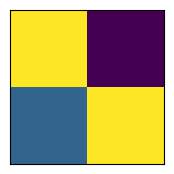

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(eigenvectors)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [15]:
def segment_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range of colors to segment (in this case, we'll segment the red color)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])


    mask = cv2.inRange(hsv, lower_red, upper_red)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)

    io.imsave(output_path, image)

# Use the function to segment an image
segment_image("cat.png", "output.png")

In [21]:
image = io.imread('cat.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
boxes = [cv2.boundingRect(cnt) for cnt in contours]

# Draw rectangles around the bounding boxes
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Find the convex hull of the contours
hulls = [cv2.convexHull(cnt) for cnt in contours]

# Find the minimum area rectangle enclosing the convex hulls
min_area_rects = [cv2.minAreaRect(hull) for hull in hulls]

# Draw rectangles around the minimum area rectangles
for rect in min_area_rects:
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image, [box], 0, (255, 0, 0), 2)

imageR1 = image

# Display the original image and the marked image
#cv2.imshow("Original1 Image", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

C:\Users\HP\AppData\Local\Temp\ipykernel_24152\2164486287.py:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [22]:
image = io.imread('cat.png')
# Define the region of interest
x = 100
y = 100
w = 200
h = 200
roi = image[y:y+h, x:x+w]
x0 = x
y0 = y

# Define the neighborhood size
neighborhood_size = (15, 15)

# Find the boundary pixels of the ROI
boundary_mask = np.zeros(image.shape[:2], dtype=np.uint8)
boundary_mask[y:y+h, x:x+w] = 255
boundary_mask = cv2.dilate(boundary_mask, kernel, iterations=1) - cv2.erode(boundary_mask, kernel, iterations=1)
contours, _ = cv2.findContours(boundary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes of the contours
boxes = [cv2.boundingRect(cnt) for cnt in contours]

# Draw rectangles around the bounding boxes
for (x, y, w, h) in boxes:
    cv2.rectangle(imager, (x+x0, y+y0), (x+x0+w, y+y0+h), (255, 0, 0), 2)

imageR2 = imager

cv2.imshow("Original Image2", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'region2 Image')

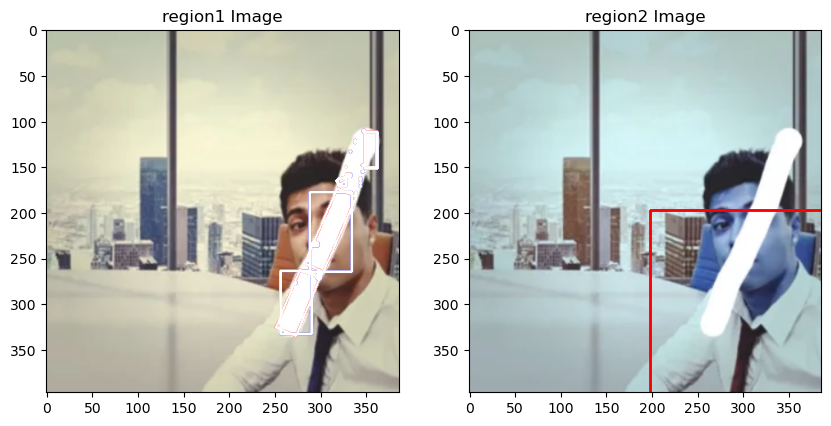

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imageR1)
axs[0].set_title('region1 Image')
axs[1].imshow(imageR2)
axs[1].set_title('region2 Image')

In [24]:
# Load an image
imageb = cv2.imread("cat.png", cv2.IMREAD_GRAYSCALE)

# Threshold the image to obtain a binary image
_, binary_image = cv2.threshold(imageb, 127, 255, cv2.THRESH_BINARY)

# Perform morphological closing to close small gaps in the boundary
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find the boundary pixels of the object
boundary_mask = np.zeros(image.shape[:2], dtype=np.uint8)
boundary_mask[binary_image == 255] = 255
boundary_mask = cv2.dilate(boundary_mask, kernel, iterations=1) - cv2.erode(boundary_mask, kernel, iterations=1)

# Find the contours in the boundary mask
contours, _ = cv2.findContours(boundary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
# Compute the perimeter, area, and circularity of the object
perimeter = cv2.arcLength(contours[0], True)
area = cv2.contourArea(contours[0])
circularity = (4 * np.pi * area) / (perimeter ** 2)

print("Perimeter:", perimeter)
print("Area:", area)
print("Circularity:", circularity)

Perimeter: 30.82842707633972
Area: 40.0
Circularity: 0.5288921508184781


In [27]:
image_path = 'cat.png'
image = cv2.imread(image_path)
# Compute the histogram of the image
hist, bins = np.histogram(image.ravel(), 256, [0, 256])

# Compute the histogram of the boundary pixels
boundary_hist, boundary_bins = np.histogram(binary_image[boundary_mask == 255].ravel(), 256, [0, 256])

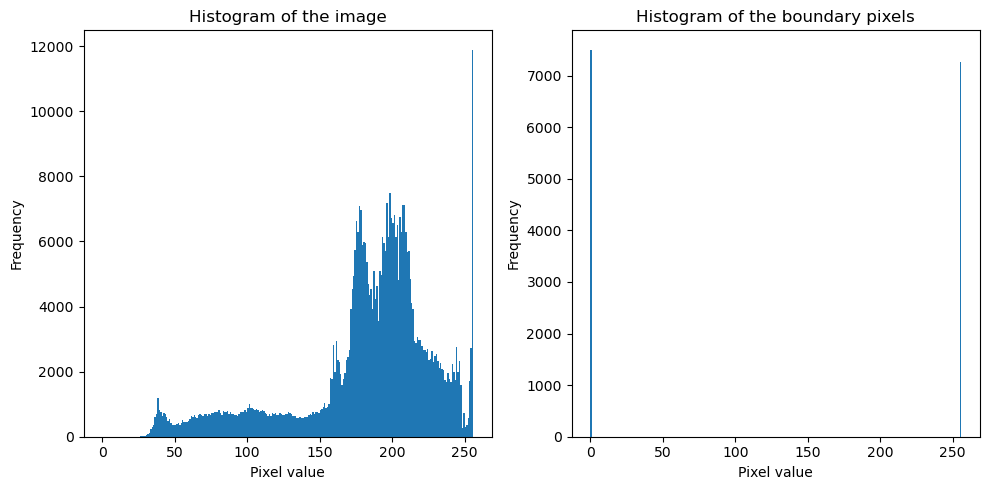

In [28]:
# Plot the histograms
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("Histogram of the image")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.hist(image.ravel(), 256, [0, 256])

plt.subplot(122)
plt.title("Histogram of the boundary pixels")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.hist(binary_image[boundary_mask == 255].ravel(), 256, [0, 256])

plt.tight_layout()
plt.show()

In [29]:
import numpy as np
from skimage.segmentation import felzenszwalb

# Load an image
image = cv2.imread("cat.png", cv2.IMREAD_GRAYSCALE)

# Perform homogeneous region extraction
segments = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Extract the bounding boxes of the homogeneous regions
boxes = []
for label in np.unique(segments):
    if label == 0:
        continue
    mask = (segments == label).astype(np.uint8)
    x, y, w, h = cv2.boundingRect(mask)
    boxes.append((x, y, x + w, y + h))

In [43]:
# Compute the area, perimeter, and centroid of each region
regions = []
for label in np.unique(segments):
    if label == 0:
        continue
    mask = (segments == label).astype(np.uint8)
    x, y, w, h = cv2.boundingRect(mask)
    area = (w * h)
    perimeter = cv2.arcLength(np.array(np.where(mask)).T, True)
    x_coord = np.where(mask)[1]
    y_coord = np.where(mask)[0]
    centroid = (int(np.mean(x_coord)), int(np.mean(y_coord)))
    regions.append((area, perimeter, centroid))

print("Homogeneous regions:")
for i, (area, perimeter, centroid) in enumerate(regions):
    print(f"Region {i+1}: Area={area}, Perimeter={perimeter}, Centroid={centroid}")

Homogeneous regions:
Region 1: Area=210, Perimeter=414.04347229003906, Centroid=(52, 1)
Region 2: Area=990, Perimeter=945.3779671192169, Centroid=(95, 5)
Region 3: Area=23187, Perimeter=32673.260467529297, Centroid=(64, 87)
Region 4: Area=139, Perimeter=276.0, Centroid=(131, 69)
Region 5: Area=5673, Perimeter=679.4341821670532, Centroid=(131, 86)
Region 6: Area=134, Perimeter=266.0, Centroid=(134, 66)
Region 7: Area=137, Perimeter=272.0, Centroid=(135, 68)
Region 8: Area=137, Perimeter=272.0, Centroid=(136, 68)
Region 9: Area=789, Perimeter=1373.8574481010437, Centroid=(138, 131)
Region 10: Area=263, Perimeter=524.0, Centroid=(140, 131)
Region 11: Area=195, Perimeter=388.0, Centroid=(141, 97)
Region 12: Area=197, Perimeter=392.0, Centroid=(142, 98)
Region 13: Area=157, Perimeter=312.0, Centroid=(143, 78)
Region 14: Area=124, Perimeter=100.60926878452301, Centroid=(144, 12)
Region 15: Area=25168, Perimeter=21883.08175945282, Centroid=(239, 45)
Region 16: Area=336, Perimeter=420.36805629

In [36]:
# Create a copy of the original image
output_image = image.copy()

# Draw rectangles around each homogeneous region
for box in boxes:
    x, y, w, h = box
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv2.imshow("Output Image", output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

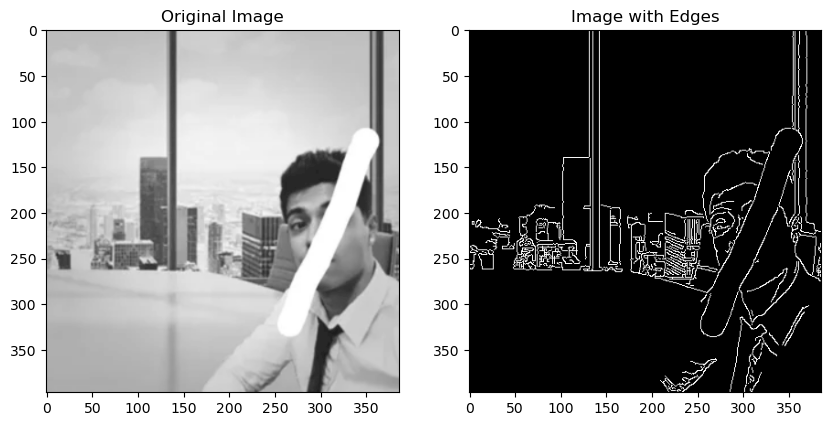

In [37]:
# Apply edge detection using the Canny algorithm
edges = cv2.Canny(gray, 50, 150)

# Display the original image and the image with edges
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Image with Edges')
plt.show()

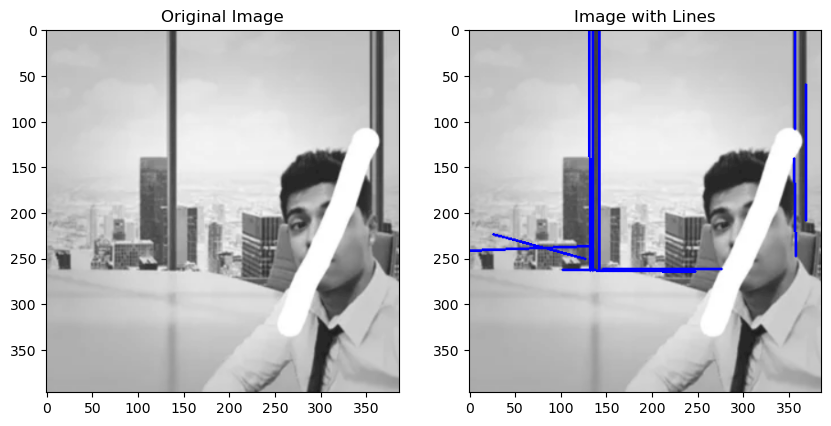

In [40]:


# Apply edge detection using the Canny algorithm
edges = cv2.Canny(gray, 50, 150)

# Apply probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the image
image_lines = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image and the image with lines
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(image_lines)
axs[1].set_title('Image with Lines')
plt.show()

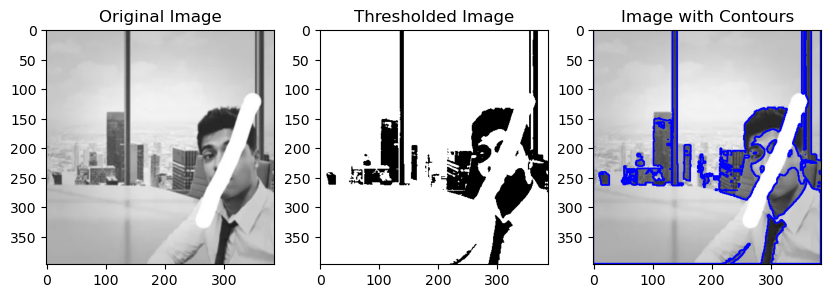

In [41]:
# Apply global thresholding
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_contours = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image_contours, contours, -1, (0, 0, 255), 2)

# Display the original image and the image with contours
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('Thresholded Image')
axs[2].imshow(image_contours)
axs[2].set_title('Image with Contours')
plt.show()

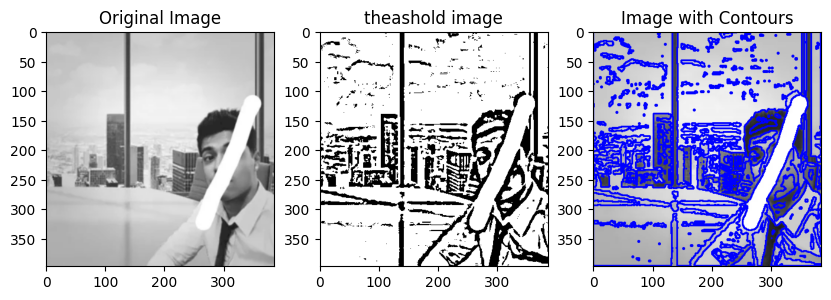

In [49]:
# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_contours = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(image_contours, contours, -1, (0, 0, 255), 2)

# Display the original image and the image with contours
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title('theashold image')
axs[2].imshow(image_contours)
axs[2].set_title('Image with Contours')

plt.show()

In [43]:
image_path = 'cat.png'
image = cv2.imread(image_path)

labels = felzenszwalb(gray, scale=100, sigma=0.5, min_size=50)

segments = slic(image, n_segments=200, sigma=5)


In [47]:

imagen = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=5)
grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
grad_orient = np.arctan2(sobel_y, sobel_x)

# Perform watershed segmentation
labeles = label(grad_mag)
markers = np.zeros(grad_mag.shape, dtype=np.int32)
markers[imagen > 0.5 * np.max(imagen)] = 1
markers[imagen < 0.25 * np.max(imagen)] = 2
markers = watershed(grad_mag, markers, mask=grad_mag)

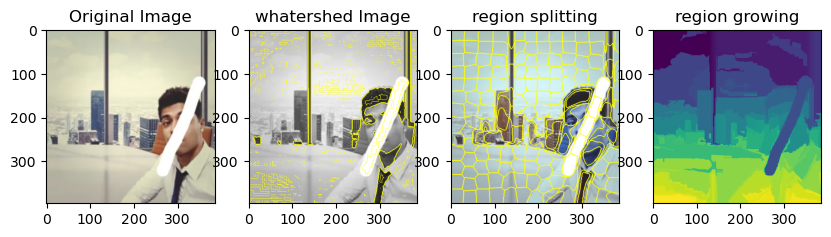

In [49]:
# Display the original image and the segmented image
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(mark_boundaries(imagen, markers))
axs[1].set_title('whatershed Image')
axs[2].imshow(mark_boundaries(image, segments))
axs[2].set_title('region splitting')
axs[3].imshow(labels)
axs[3].set_title('region growing')

plt.show()